In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [48]:
data = pd.read_csv("train.csv")

In [27]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [28]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [30]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [31]:
data.describe(include='O')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [32]:
data.isnull().mean() * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [49]:
#data.dropna(how='any',axis=0,inplace=True)
#data.shape (4650,12) # dropping almost half of the records which will not be good for the Model

### There are total 12 columns
- **11 are Independent variable**               
    Item_Identifier                    
    Item_Weight                    
    Item_Fat_Content                    
    Item_Visibility                  
    Item_Type                      
    Item_MRP                      
    Outlet_Identifier                    
    Outlet_Establishment_Year                
    Outlet_Size                             
    Outlet_Location_Type                    
    Outlet_Type    
    
    

- **1 target variable (numerical feature)**               
    Item_Outlet_Sales                  

## **Independent Variable**

**Numerical features**                   
Item_Weight ;                                                                                              	
Item_Visibility                         
Item_MRP                      
Outlet_Establishment_Year                          

**Categorical features**                  
Item_Identifier              
Item_Fat_Content               
Item_Type                    
Outlet_Identifier                 
Outlet_Size                  
Outlet_Location_Type                 
Outlet_Type                      





## UNIVARIATE

### Numerical






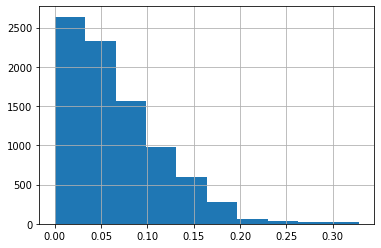

In [33]:
data['Item_Visibility'].hist()

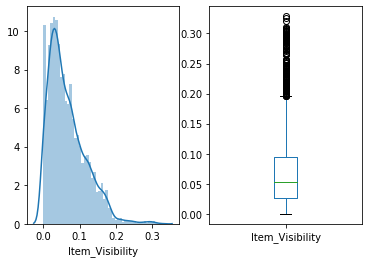

In [34]:
# remove Nan values before plotting graph otherwise it will throw error
plt.figure(1)
plt.subplot(121)
sns.distplot(data['Item_Visibility'])

plt.subplot(122)

data['Item_Visibility'].plot.box()
plt.show()

### Categorical

Item_Fat_Content              
Item_Type                  
Outlet_Identifier            
Outlet_Size                 
Outlet_Location_Type              
Outlet_Type            

In [35]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [36]:
data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [37]:
data['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [38]:
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [39]:
data['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [40]:
data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

## BI-VARIATE

In [41]:
import statsmodels.formula.api as smf

In [42]:
ols = smf.ols(formula='Item_Outlet_Sales ~ Item_Visibility',data=data).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     143.3
Date:                Fri, 20 Nov 2020   Prob (F-statistic):           9.04e-33
Time:                        10:23:57   Log-Likelihood:                -75452.
No. Observations:                8523   AIC:                         1.509e+05
Df Residuals:                    8521   BIC:                         1.509e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2462.6155     29.803     82.631      0.000    2404.195    2521.036
Item_Visibility -4254.0139    355.310    -11.973      0.000   -4950.507   -3557.521
==============================================================================
Omnibus:                     1625.343   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2993.949
Skew:                           1.193   Prob(JB):                         0.00
Kurtosis:                       4.654   Cond. No.                         19.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
ols2 = smf.ols(formula='Item_Outlet_Sales ~ Item_MRP',data=data).fit()
ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     4049.
Date:                Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                        10:23:57   Log-Likelihood:                -73866.
No. Observations:                8523   AIC:                         1.477e+05
Df Residuals:                    8521   BIC:                         1.478e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5751     37.671     -0.307      0.759     -85.420      62.270
Item_MRP      15.5530      0.244     63.635      0.000      15.074      16.032
==============================================================================
Omnibus:                      751.910   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1620.941
Skew:                           0.566   Prob(JB):                         0.00
Kurtosis:                       4.812   Cond. No.                         382.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
ols2 = smf.ols(formula='Item_Outlet_Sales ~ Outlet_Establishment_Year',data=data).fit()
ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     20.62
Date:                Fri, 20 Nov 2020   Prob (F-statistic):           5.67e-06
Time:                        11:09:30   Log-Likelihood:                -75513.
No. Observations:                8523   AIC:                         1.510e+05
Df Residuals:                    8521   BIC:                         1.510e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  2.219e+04   4406.380      5.036      0.000    1.36e+04    3.08e+04
Outlet_Establishment_Year   -10.0157      2.206     -4.541      0.000     -14.339      -5.692
==============================================================================
Omnibus:                     1502.025   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2634.450
Skew:                           1.136   Prob(JB):                         0.00
Kurtosis:                       4.503   Cond. No.                     4.77e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## ANOVA TEST

NULL hypothesis: there is no relationship b/w Item_Fat_Content and Item_Outlet_Sales          
Alternate hypothesis: there is relatioship b/w Item_Fat_Content and Item_Outlet_Sales    
Below ols.summary() result shows that p-value(Prob (F-statistic):	0.141) is greater than 0.05, which means we should reject the NULL hypothesis.           
But here we should not reply on ANOVA test as the categorical column have more than 2 categories. So we will go for tukey's test.


Field : **Item_Fat_Content**             
Low Fat 5089 ,Regular 2889,LF 316,reg 117,low fat 112


In [58]:
import statsmodels.formula.api as smf
anova1 = smf.ols(formula='Item_Outlet_Sales ~Item_Fat_Content',data=data).fit()
anova1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.726
Date:                Fri, 20 Nov 2020   Prob (F-statistic):              0.141
Time:                        22:13:50   Log-Likelihood:                -75520.
No. Observations:                8523   AIC:                         1.510e+05
Df Residuals:                    8518   BIC:                         1.511e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    2073.5519     95.982     21.604      0.000    1885.404    2261.699
Item_Fat_Content[T.Low Fat]    90.9254     98.917      0.919      0.358    -102.976     284.826
Item_Fat_Content[T.Regular]   161.6348    101.095      1.599      0.110     -36.536     359.805
Item_Fat_Content[T.low fat]    14.1888    187.630      0.076      0.940    -353.611     381.989
Item_Fat_Content[T.reg]      -111.3597    184.646     -0.603      0.546    -473.310     250.591
==============================================================================
Omnibus:                     1589.015   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2887.438
Skew:                           1.176   Prob(JB):                         0.00
Kurtosis:                       4.613   Cond. No.                         16.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""